In [33]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import itertools
import time
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\wanto\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv(r'C:\Users\wanto\OneDrive\바탕 화면\데이터분석\데이터 분석\DATA\JobCare_data\train.csv')
test = pd.read_csv(r'C:\Users\wanto\OneDrive\바탕 화면\데이터분석\데이터 분석\DATA\JobCare_data\test.csv')

In [3]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,501948,True,True,True,True,False,False,1,7,4,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1
501949,501949,True,False,False,True,False,False,1,1,2,...,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1


In [89]:
test

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,46399,True,True,True,False,False,False,2,0,4,...,1,2,759,147,1,5,91,425040,726084,2020-12-17 01:06:26
46400,46400,True,False,False,True,False,False,2,0,4,...,1,2,759,147,1,4,91,290061,156948,2020-12-29 21:57:25
46401,46401,True,True,False,True,True,True,2,0,3,...,1,2,759,147,1,4,288,307951,175069,2020-12-10 19:09:09
46402,46402,True,True,False,True,True,True,1,3,3,...,3,2,759,147,1,5,288,308354,174849,2020-12-07 14:04:34


In [5]:
train.shape

(501951, 35)

In [6]:
test.shape

(46404, 34)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [8]:
train_match_yn = pd.concat([train['id'],train['d_l_match_yn'], train['d_m_match_yn'], train['d_s_match_yn'],
                    train['h_l_match_yn'], train['h_m_match_yn'], train['h_s_match_yn']], axis=1)
train_match_yn

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn
0,0,True,True,True,False,False,False
1,1,False,False,False,True,True,False
2,2,False,False,False,True,False,False
3,3,False,False,False,True,False,False
4,4,True,True,True,False,False,False
...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False
501947,501947,True,True,False,True,False,False
501948,501948,True,True,True,True,False,False
501949,501949,True,False,False,True,False,False


In [9]:
train_person_attr = pd.concat([train['id'],train['person_attribute_a'], train['person_attribute_a_1'], train['person_attribute_b']], axis=1)
train_person_attr

,id,person_attribute_a,person_attribute_a_1,person_attribute_b
0,0,1,4,3
1,1,1,3,4
2,2,2,0,3
3,3,2,0,2
4,4,1,3,4
...,...,...,...,...
501946,501946,1,1,2
501947,501947,1,6,2
501948,501948,1,7,4
501949,501949,1,1,2


In [10]:
print(train_person_attr['person_attribute_a'].value_counts())
print(train_person_attr['person_attribute_a_1'].value_counts())
print(train_person_attr['person_attribute_b'].value_counts())

1    331260
2    170691
Name: person_attribute_a, dtype: int64
0    158626
1     61195
5     57783
2     51895
6     49820
3     46340
4     44325
7     31967
Name: person_attribute_a_1, dtype: int64
2    223884
3    139489
4    121200
1     10150
5      7123
0       105
Name: person_attribute_b, dtype: int64


In [11]:
train_person_prefer = pd.concat([train['id'],train['person_prefer_c'], train['person_prefer_d_1'], train['person_prefer_d_2'],
                              train['person_prefer_d_3'], train['person_prefer_e'],train['person_prefer_f'],train['person_prefer_g'],
                                train['person_prefer_h_1'], train['person_prefer_h_2'], train['person_prefer_h_3']], axis=1)
train_person_prefer

,id,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3
0,0,5,275,370,369,8,1,1,4,95,59
1,1,1,114,181,175,4,1,1,131,101,96
2,2,5,464,175,452,3,1,1,54,263,56
3,3,5,703,705,704,3,1,1,72,227,2
4,4,5,275,370,369,4,1,1,214,210,209
...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,2,1192,935,1228,3,1,1,59,4,95
501947,501947,1,118,113,110,4,1,1,105,142,95
501948,501948,1,147,46,145,4,1,1,59,127,139
501949,501949,1,46,147,145,4,1,1,251,49,258


In [12]:
print(train_person_prefer['person_prefer_c'].value_counts())
print(train_person_prefer['person_prefer_d_1'].value_counts())
print(train_person_prefer['person_prefer_d_2'].value_counts())
print(train_person_prefer['person_prefer_d_3'].value_counts())

1    304571
5    156688
2     20223
3     15665
4      4804
Name: person_prefer_c, dtype: int64
114     41720
102     25470
1227    24337
181     13213
857     13059
        ...  
1156        1
1072        1
485         1
206         1
633         1
Name: person_prefer_d_1, Length: 1093, dtype: int64
181     49859
1086    19260
175     16558
102     14693
113     13769
        ...  
556         1
1165        1
559         1
481         1
548         1
Name: person_prefer_d_2, Length: 1081, dtype: int64
175     49049
857     27014
114     26647
95      23355
1227    16177
        ...  
1015        1
179         1
1165        1
1012        1
306         1
Name: person_prefer_d_3, Length: 1043, dtype: int64


In [13]:
print(train_person_prefer['person_prefer_e'].value_counts())
print(train_person_prefer['person_prefer_f'].value_counts())
print(train_person_prefer['person_prefer_g'].value_counts())

4     160100
3     139683
5      81635
0      66676
6      31407
7       8641
8       6259
2       2323
10      1936
9       1473
11      1452
1        366
Name: person_prefer_e, dtype: int64
1    501951
Name: person_prefer_f, dtype: int64
1    501951
Name: person_prefer_g, dtype: int64


- person_prefer_f와 person_prefer_g는 모든 값이 같기 때문에 drop 해준다

In [14]:
print(train_person_prefer['person_prefer_h_1'].value_counts())
print(train_person_prefer['person_prefer_h_2'].value_counts())
print(train_person_prefer['person_prefer_h_3'].value_counts())

4      35257
31     31393
2      22458
59     20938
49     19155
       ...  
249        9
247        9
70         8
267        8
276        1
Name: person_prefer_h_1, Length: 279, dtype: int64
95     42383
4      36033
278    32846
251    23068
31     15713
       ...  
220        8
155        5
276        4
70         3
267        1
Name: person_prefer_h_2, Length: 279, dtype: int64
59     36745
95     33260
4      29087
86     27323
278    21123
       ...  
221        4
267        4
163        1
276        1
70         1
Name: person_prefer_h_3, Length: 279, dtype: int64


In [15]:
train_contents_attr = pd.concat([train['id'], train['contents_attribute_i'], train['contents_attribute_a'], 
                                train['contents_attribute_j_1'], train['contents_attribute_j'], train['contents_attribute_c']
                                , train['contents_attribute_k'], train['contents_attribute_l'], train['contents_attribute_d'],
                                train['contents_attribute_m'], train['contents_attribute_e'], train['contents_attribute_h']], axis=1)
train_contents_attr

,id,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h
0,0,3,3,10,2,1,2,1608,275,1,4,139
1,1,1,3,5,1,1,2,1608,275,1,4,133
2,2,3,1,10,2,1,1,1600,94,1,4,53
3,3,1,3,5,1,1,2,1608,275,5,3,74
4,4,1,1,10,2,1,2,1608,275,1,4,74
...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,3,3,5,1,1,2,354,147,1,5,65
501947,501947,3,3,10,2,1,2,163,120,1,4,142
501948,501948,3,1,5,1,1,2,438,147,2,7,65
501949,501949,3,2,5,1,1,2,660,147,3,4,259


In [16]:
print(train_contents_attr['contents_attribute_i'].value_counts())
print(train_contents_attr['contents_attribute_a'].value_counts())
print(train_contents_attr['contents_attribute_j_1'].value_counts())
print(train_contents_attr['contents_attribute_j'].value_counts())
print(train_contents_attr['contents_attribute_e'].value_counts())
print(train_contents_attr['contents_attribute_c'].value_counts())
print(train_contents_attr['contents_attribute_k'].value_counts())

3    341052
1    116273
2     44626
Name: contents_attribute_i, dtype: int64
3    308855
1    141895
2     51201
Name: contents_attribute_a, dtype: int64
5     330790
10     89307
3      30664
4      19649
9      19115
6      10808
2       1416
8        137
1         65
Name: contents_attribute_j_1, dtype: int64
1    382584
2    119367
Name: contents_attribute_j, dtype: int64
3     187593
4     175628
5      81684
6      27776
2       9414
7       7734
1       5179
8       3991
0       1025
9        908
10       673
11       346
Name: contents_attribute_e, dtype: int64
1    401409
3     82929
2     12459
4      5154
Name: contents_attribute_c, dtype: int64
2    483533
1     18418
Name: contents_attribute_k, dtype: int64


In [17]:
print(train_contents_attr['contents_attribute_l'].value_counts())
print(train_contents_attr['contents_attribute_d'].value_counts())
print(train_contents_attr['contents_attribute_m'].value_counts())
print(train_contents_attr['contents_attribute_e'].value_counts())
print(train_contents_attr['contents_attribute_h'].value_counts())

759     15373
1648    11984
1835    10967
861      9899
572      9604
        ...  
1745        1
220         1
1533        1
1717        1
1905        1
Name: contents_attribute_l, Length: 1752, dtype: int64
1227    24668
114     23028
857     18808
102     18721
181     12792
        ...  
130         1
559         1
191         1
530         1
829         1
Name: contents_attribute_d, Length: 1065, dtype: int64
1    272885
4     86367
5     67639
2     57114
3     17946
Name: contents_attribute_m, dtype: int64
3     187593
4     175628
5      81684
6      27776
2       9414
7       7734
1       5179
8       3991
0       1025
9        908
10       673
11       346
Name: contents_attribute_e, dtype: int64
139    15030
288    13430
68     11877
127    11243
43     11018
       ...  
248       23
220       21
276       13
267       12
164        9
Name: contents_attribute_h, Length: 250, dtype: int64


In [18]:
train.drop(['person_prefer_f', 'person_prefer_g'],axis=1, inplace=True)

In [20]:
print(test['person_prefer_f'].value_counts())
print(test['person_prefer_g'].value_counts())

1    46404
Name: person_prefer_f, dtype: int64
1    46404
Name: person_prefer_g, dtype: int64


In [21]:
test.drop(['person_prefer_f', 'person_prefer_g'],axis=1, inplace=True)

In [22]:
print(train.shape)
print(test.shape)

(501951, 33)
(46404, 32)


In [23]:
corr_df = train.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
id,1.00,0.08,0.04,0.01,0.02,0.03,0.02,0.01,-0.01,0.00,...,-0.03,0.01,-0.04,-0.06,-0.02,-0.01,0.02,0.02,0.01,0.35
d_l_match_yn,0.08,1.00,0.46,0.32,-0.01,-0.02,-0.02,-0.06,0.03,-0.03,...,-0.06,0.02,-0.04,-0.16,-0.04,-0.03,-0.05,-0.04,-0.03,0.14
d_m_match_yn,0.04,0.46,1.00,0.70,-0.06,-0.07,-0.06,-0.08,0.05,-0.01,...,-0.02,0.01,0.06,-0.09,0.00,0.03,-0.06,-0.05,-0.04,0.12
d_s_match_yn,0.01,0.32,0.70,1.00,-0.07,-0.06,-0.05,-0.06,0.04,-0.01,...,-0.01,0.00,0.05,-0.01,0.00,0.04,-0.04,-0.04,-0.02,0.09
h_l_match_yn,0.02,-0.01,-0.06,-0.07,1.00,0.38,0.31,0.03,-0.06,-0.07,...,0.01,-0.00,0.03,-0.04,-0.01,-0.18,-0.04,0.01,-0.04,0.02
h_m_match_yn,0.03,-0.02,-0.07,-0.06,0.38,1.00,0.81,0.02,-0.06,-0.10,...,-0.00,-0.01,-0.04,0.00,-0.07,-0.13,0.37,0.19,0.16,0.00
h_s_match_yn,0.02,-0.02,-0.06,-0.05,0.31,0.81,1.00,0.01,-0.04,-0.11,...,-0.01,-0.01,-0.07,0.01,-0.07,-0.11,0.23,0.15,0.12,0.01
person_attribute_a,0.01,-0.06,-0.08,-0.06,0.03,0.02,0.01,1.00,-0.67,0.02,...,0.01,-0.00,0.03,0.05,0.00,-0.11,0.02,0.03,0.02,-0.02
person_attribute_a_1,-0.01,0.03,0.05,0.04,-0.06,-0.06,-0.04,-0.67,1.00,-0.03,...,-0.02,0.01,-0.06,-0.02,-0.01,0.17,-0.02,-0.04,-0.03,0.02
person_attribute_b,0.00,-0.03,-0.01,-0.01,-0.07,-0.10,-0.11,0.02,-0.03,1.00,...,0.02,-0.00,0.12,-0.24,0.07,0.06,-0.02,-0.04,-0.03,-0.00


In [25]:
plt.__version__

'3.1.1'

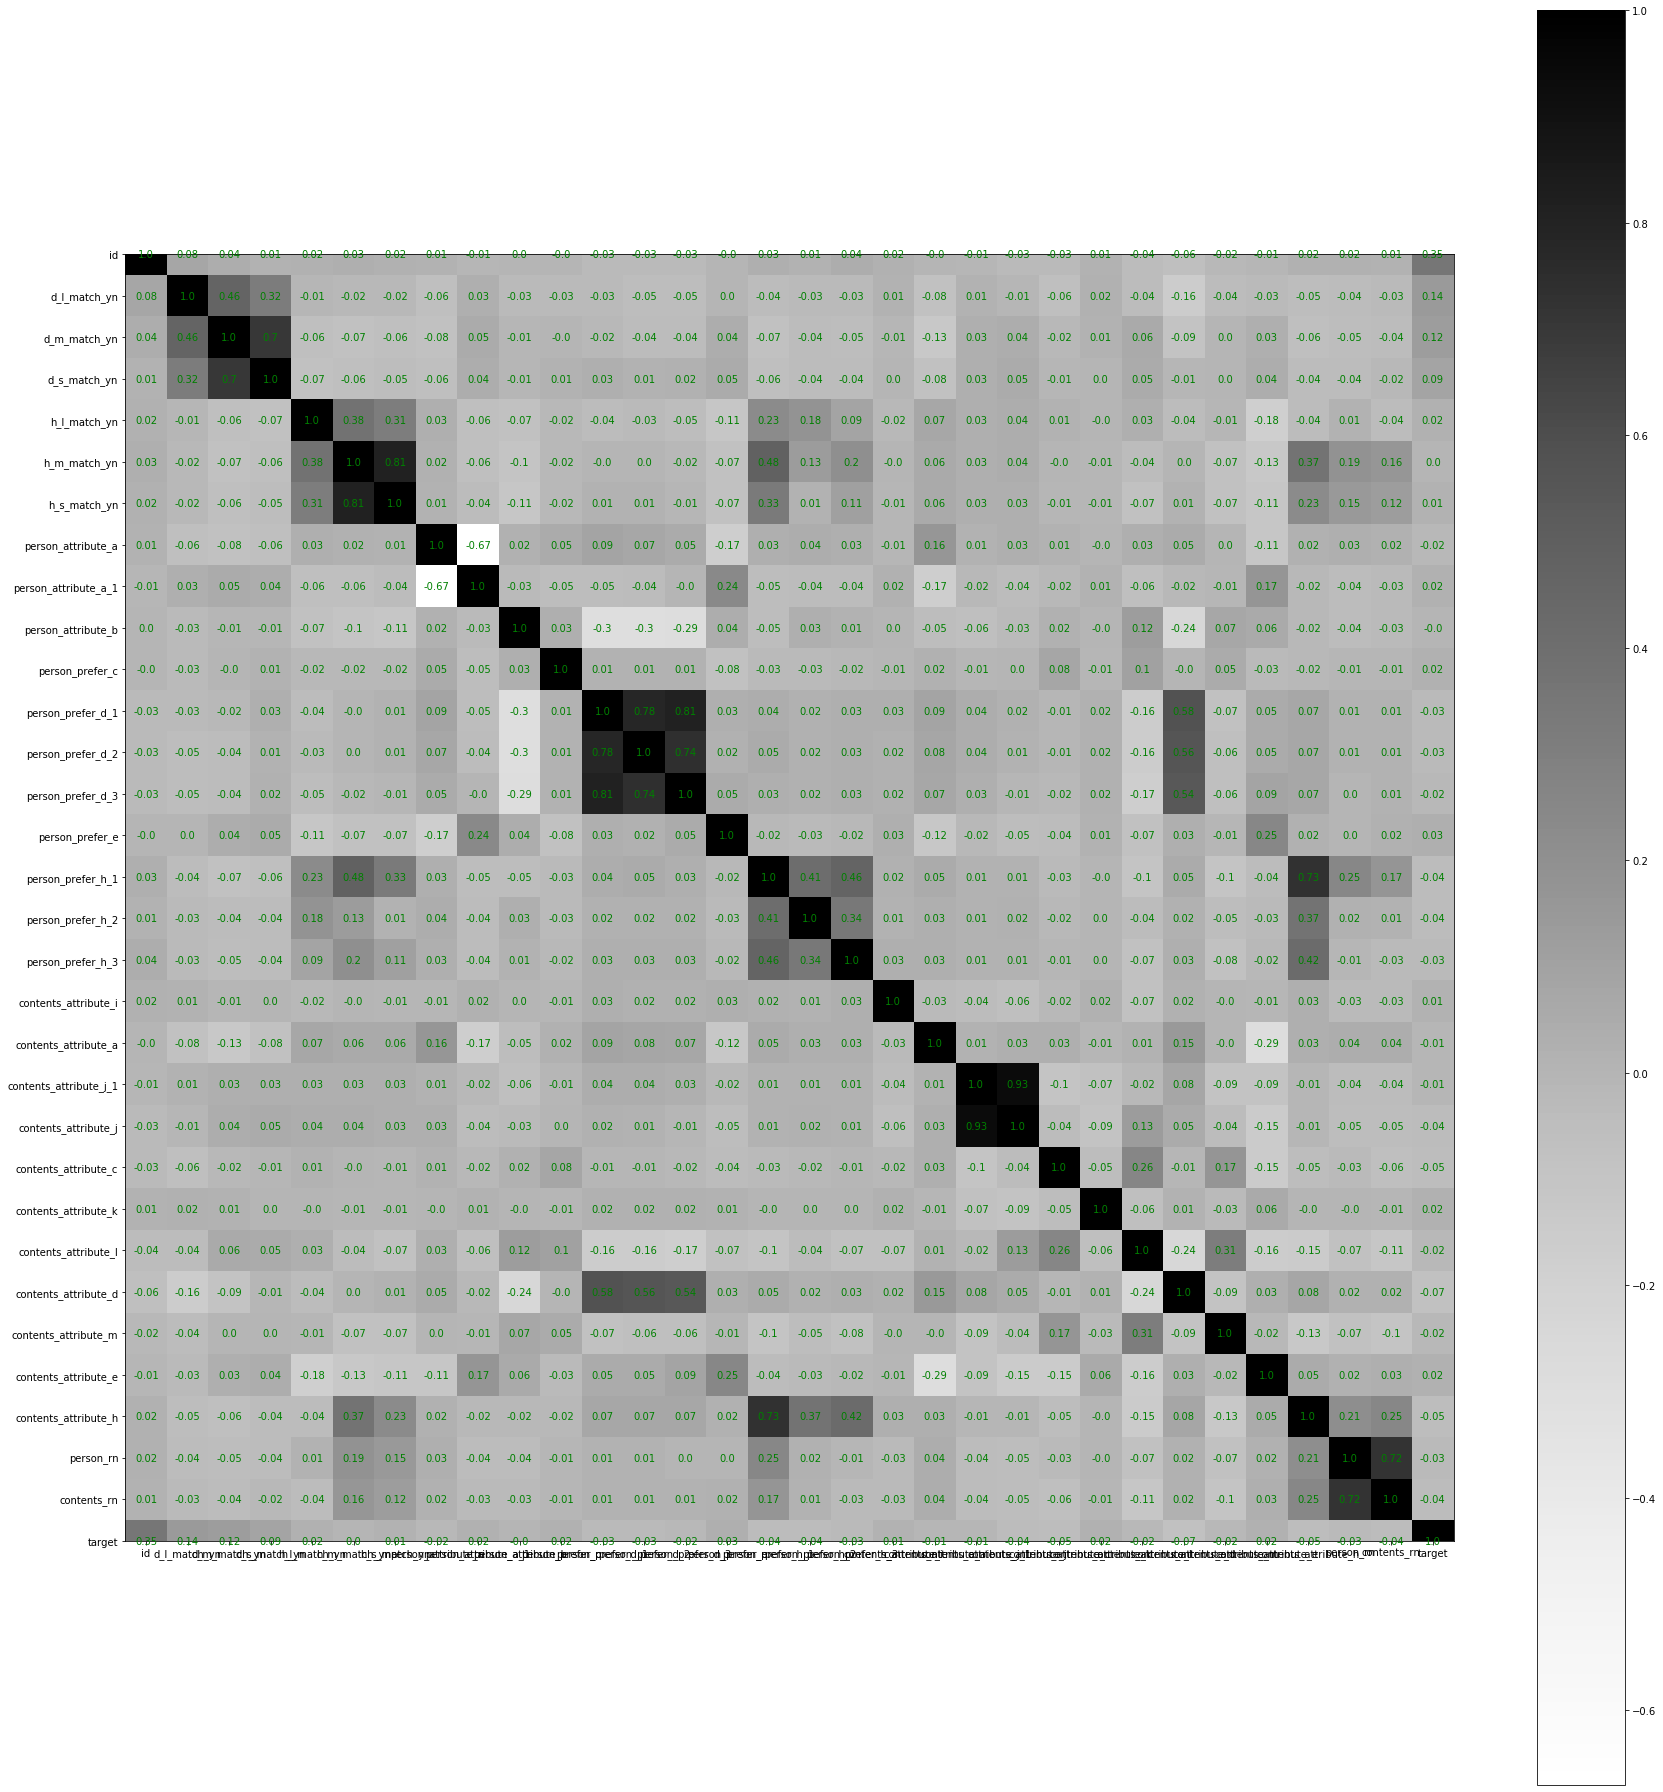

In [32]:
fig, ax = plt.subplots(figsize=(25, 25))
im = ax.imshow(corr_df, cmap='Greys')

# Color Bar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y, x], ha='center', va='center', color='g')

fig.tight_layout()   
plt.show()   

In [79]:
X = train.drop(['target'], axis=1)
y = train['target']

In [80]:
X

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,True,True,False,False,False,1,4,3,...,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36
1,1,False,False,False,True,True,False,1,3,4,...,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52
2,2,False,False,False,True,False,False,2,0,3,...,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10
3,3,False,False,False,True,False,False,2,0,2,...,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34
4,4,True,True,True,False,False,False,1,3,4,...,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,...,1,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52
501947,501947,True,True,False,True,False,False,1,6,2,...,1,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51
501948,501948,True,True,True,True,False,False,1,7,4,...,1,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24
501949,501949,True,False,False,True,False,False,1,1,2,...,1,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21


- 추천 알고리즘이라 개인에게 얼마나 최적화된 컨텐츠를 추천하는지가 관건
- 해당ID의 회원속성, 회원선호속성, 컨텐츠속성, 대분류, 중분류가 매칭 여부에 끼치는 영향을 알아내고
- 베터화를 시켜야하나? 무

# 일단 모델 적용

In [81]:
X = X.drop(['id', 'contents_open_dt'], axis=1 )

In [63]:
X

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn
0,0,True,True,True,False,False,False,1,4,3,...,2,1,2,1608,275,1,4,139,618822,354805
1,1,False,False,False,True,True,False,1,3,4,...,1,1,2,1608,275,1,4,133,571659,346213
2,2,False,False,False,True,False,False,2,0,3,...,2,1,1,1600,94,1,4,53,399816,206408
3,3,False,False,False,True,False,False,2,0,2,...,1,1,2,1608,275,5,3,74,827967,572323
4,4,True,True,True,False,False,False,1,3,4,...,2,1,2,1608,275,1,4,74,831614,573899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,...,1,1,2,354,147,1,5,65,503156,285850
501947,501947,True,True,False,True,False,False,1,6,2,...,2,1,2,163,120,1,4,142,676255,456996
501948,501948,True,True,True,True,False,False,1,7,4,...,1,1,2,438,147,2,7,65,484528,293258
501949,501949,True,False,False,True,False,False,1,1,2,...,1,1,2,660,147,3,4,259,456330,273797


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
test = test.drop(['id', 'contents_open_dt'], axis=1 )

In [92]:
predict1 = clf.predict(test)

In [94]:
submission = pd.read_csv(r'C:\Users\wanto\OneDrive\바탕 화면\데이터분석\데이터 분석\DATA\JobCare_data\sample_submission.csv')
submission['target'] = predict1

submission.to_csv('2022-01-12-1.csv', index=False)

In [69]:
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label:1")
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1-Score: ", F1_Score)

In [76]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(train_y))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(test_x), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(test_y, lgb_model_predict) # 모델 분류 결과 평가

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2948
[LightGBM] [Info] Number of data points in the train set: 401560, number of used features: 31
[LightGBM] [Info] Start training from score -0.692316
[LightGBM] [Info] Start training from score -0.693979
Model_Evaluation with Label:1
Accuracy:  0.7080216354055643
Precision:  0.8644599303135888
Recall:  0.4939082656473961
F1-Score:  0.6286423757158061


In [77]:
# RandomForestClasiifier
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                             max_depth = 10, # 트리 최대 깊이 10
                                             random_state = 42) # 시드값 고정
rf_model = random_forest_model.fit(train_x, train_y) # 학습 진행
rf_predict = rf_model.predict(test_x) # 평가 데이터 예측
model_evaluation(test_y, rf_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.7134902531103385
Precision:  0.8335456607525712
Recall:  0.5340420449116101
F1-Score:  0.6509979979372688


In [48]:
X = X.drop(['contents_open_dt'], inplace=True, axis=1 )

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
import graphviz 

In [ ]:
X.feature_names

In [ ]:
dot_data=tree.export_graphviz(clf,out_file=None,
                             feature_names=X,
                            class_names=y,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph=graphviz.Source(dot_data)